In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

### Feature Engineering and Cleaning


We want to return to our Housing example and consider how to use some of `scikitlearn`'s functionality to deal with missing values.  We want to determine the correct way of dealing with these one by one, and use some of what we know about the data to inform these decisions.  If we have objects that are missing values, we can either exclude the observations, or encode the missing values using some kind of numerical value.  


In [2]:
ames = pd.read_csv('data/ames_housing.csv')

In [3]:
ames.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
ames['Alley'].value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

In [6]:
ames['Alley'] = ames['Alley'].fillna("None")

In [7]:
ames['Alley'].value_counts()

None    1369
Grvl      50
Pave      41
Name: Alley, dtype: int64

In [8]:
ames['FireplaceQu'].value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [9]:
ames['FireplaceQu'] = ames['FireplaceQu'].fillna("None")

In [10]:
ames['MiscFeature'].value_counts()

Shed    49
Othr     2
Gar2     2
TenC     1
Name: MiscFeature, dtype: int64

In [11]:
ames['MoSold'].value_counts()

6     253
7     234
5     204
4     141
8     122
3     106
10     89
11     79
9      63
12     59
1      58
2      52
Name: MoSold, dtype: int64

Note the existence of a number of ordinal data points.  We can encode these to follow the data dictionary. https://ww2.amstat.org/publications/jse/v19n3/decock/datadocumentation.txt

In [16]:
ames["BsmtCond"].unique()

array([ 3.,  4., nan,  2.,  1.])

In [14]:
ames = ames.replace({"BsmtCond": {"No": 0, "Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5}})

In [15]:
ames['BsmtCond'].value_counts()

3.0    1311
4.0      65
2.0      45
1.0       2
Name: BsmtCond, dtype: int64

In [13]:
ames["BsmtQual"].unique()

array(['Gd', 'TA', 'Ex', nan, 'Fa'], dtype=object)

In [17]:
ames = ames.replace({"BsmtQual" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA": 3, "Gd" : 4, "Ex" : 5}})

In [18]:
ames['BsmtQual'].value_counts()

3.0    649
4.0    618
5.0    121
2.0     35
Name: BsmtQual, dtype: int64

**PROBLEMS**

Continue to code a few more columns and make sure to replace any `na` values in at least:

- `OverallQual`
- `OverallCond`
- `GarageQual`
- `GarageCond`
- `PoolArea`
- `PoolQC`

In [19]:
ames = ames.replace({"BsmtQual" : {1: "isntgood"}})

In [20]:
ames['OverallQual'].value_counts()

5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: OverallQual, dtype: int64

### Adding New Features

We can create many new features to help improve our models performance.  For example, any of the measures that have multiple categories could be combined.  Take `Overall`, `Garage`, and `Pool` for example.  We can create combinations of the subcolumns as follows.

In [26]:
ames['BasementOverall'] = ames['BsmtCond'] * ames['BsmtQual']

In [28]:
ames = ames.replace({"GarageQual" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA": 3, "Gd" : 4, "Ex" : 5}})

In [46]:
ames = ames.replace({"GarageCond" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA": 3, "Gd" : 4, "Ex" : 5}})

In [47]:
ames['GarageCond'].fillna(0, inplace = True)

In [49]:
ames['PoolQC'].unique()

array([nan, 'Ex', 'Fa', 'Gd'], dtype=object)

In [52]:
ames['PoolArea'].value_counts()

0      1453
738       1
648       1
576       1
555       1
519       1
512       1
480       1
Name: PoolArea, dtype: int64

In [50]:
ames = ames.replace({"PoolQC" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA": 3, "Gd" : 4, "Ex" : 5}})
ames['PoolQC'].fillna(0, inplace = True)

In [51]:
ames['PoolQC'].value_counts()

0.0    1453
4.0       3
2.0       2
5.0       2
Name: PoolQC, dtype: int64

**PROBLEMS**


Continue to add additional features that combine other existing ones in a sensible way.  Here are a few additional ideas:

```python
ames['OverallGrade'] = ames['OverallQual'] * ames['OverallCond']
ames['GarageOverall'] = ames['GarageQual'] * ames['GarageCond']
ames['PoolOverall'] = ames['PoolArea'] * ames['PoolQC']
```

Be sure you've coded these as numeric vectors before creating columns based on arithmetic involving them.

In [32]:
ames['GarageQual'].fillna(0, inplace = True)

In [35]:
ames['GarageQual'] = ames['GarageQual'].astype(int)

In [36]:
type(ames['GarageQual'][0])

numpy.int64

In [45]:
ames['GarageCond'].unique()

array(['TA', 'Fa', nan, 'Gd', 'Po', 'Ex'], dtype=object)

In [53]:
ames['OverallGrade'] = ames['OverallQual'] * ames['OverallCond']
ames['GarageOverall'] = ames['GarageQual'] * ames['GarageCond']
ames['PoolOverall'] = ames['PoolArea'] * ames['PoolQC']

In [60]:
ames.columns

Index([u'Id', u'MSSubClass', u'MSZoning', u'LotFrontage', u'LotArea',
       u'Street', u'Alley', u'LotShape', u'LandContour', u'Utilities',
       u'LotConfig', u'LandSlope', u'Neighborhood', u'Condition1',
       u'Condition2', u'BldgType', u'HouseStyle', u'OverallQual',
       u'OverallCond', u'YearBuilt', u'YearRemodAdd', u'RoofStyle',
       u'RoofMatl', u'Exterior1st', u'Exterior2nd', u'MasVnrType',
       u'MasVnrArea', u'ExterQual', u'ExterCond', u'Foundation', u'BsmtQual',
       u'BsmtCond', u'BsmtExposure', u'BsmtFinType1', u'BsmtFinSF1',
       u'BsmtFinType2', u'BsmtFinSF2', u'BsmtUnfSF', u'TotalBsmtSF',
       u'Heating', u'HeatingQC', u'CentralAir', u'Electrical', u'1stFlrSF',
       u'2ndFlrSF', u'LowQualFinSF', u'GrLivArea', u'BsmtFullBath',
       u'BsmtHalfBath', u'FullBath', u'HalfBath', u'BedroomAbvGr',
       u'KitchenAbvGr', u'KitchenQual', u'TotRmsAbvGrd', u'Functional',
       u'Fireplaces', u'FireplaceQu', u'GarageType', u'GarageYrBlt',
       u'GarageFinish',

### Scikitlearn Linear Regression

**PROBLEM**

Using the `sklearn` implementation of `LinearRegression()`, create a test and train set from your housing data.  To begin, fit a linear model on the **Logarithm** of the sales column with the `GrLivArea` feature.  Use this as your baseline to compare your transformations to.  

Include the transformations from above into a second linear model and try it out on the test set. Did the performance improve with your adjustments and transformations? 

Add polynomial features into the mix and see if you can get better improvement still.

In [39]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [69]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [92]:
ames_corr = ames.corr()

In [95]:
ames_corr['SalePrice'].sort_values(ascending = False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
BsmtQual         0.644019
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
OverallGrade     0.565294
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
GarageOverall    0.274010
GarageQual       0.273839
LotArea          0.263843
GarageCond       0.263191
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
BsmtCond         0.160658
PoolQC           0.111696
PoolOverall      0.111548
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal     

## Lasso

In [102]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

In [113]:
ames_num = ames.select_dtypes('number')
ames_num.fillna(0, inplace = True)

/anaconda2/lib/python2.7/site-packages/pandas/core/frame.py:3790: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


In [114]:
scaler = StandardScaler()
ames_scaled = scaler.fit_transform(ames_num)

In [119]:
ames_scaled = pd.DataFrame(ames_scaled, columns = ames_num.columns)

In [123]:
ames_scaled.dropna(inplace = True)

In [124]:
lasso = Lasso()
X = ames_scaled.drop(['SalePrice'], axis = 1)
lasso.fit(X, ames_scaled['SalePrice'])

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [127]:
lasso.coef_[10]

0.0

In [128]:
## Build a lasso model and look at the coefficiants to determine the best features to keep in the model

In [129]:
#Loop through every column and print the coefficent for the columns against the saleprice

In [ ]:
for i, j 

## Linear/Polynomial Regression Model

In [134]:
X = ames[['SalePrice','OverallGrade', 'GarageOverall','PoolOverall','TotalBsmtSF','GarageCars','GrLivArea','BsmtFinSF1']]
y = ames['GrLivArea']
lr = LinearRegression()
lr.fit(X, y)
pred = lr.predict(X)
np.sqrt(mean_squared_error(pred, y))

3.078281485542073e-12

In [135]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [88]:
for i in range(1,11):
    pipe = make_pipeline(PolynomialFeatures(degree = i), LinearRegression())
    pipe.fit(X_train, y_train)
    pred = pipe.predict(X_test)
    #mse = np.sqrt(mean_squared_error(pred, y_test))
    print("The mean squared error for degree {} is {}.".format(i, np.sqrt(mean_squared_error(pred, y_test))))

The mean squared error for degree 1 is 336.935725334.
The mean squared error for degree 2 is 462.8791215.
The mean squared error for degree 3 is 16470.3267416.
The mean squared error for degree 4 is 32256.9254193.
The mean squared error for degree 5 is 1206392.56834.
The mean squared error for degree 6 is 25990340.2681.
The mean squared error for degree 7 is 104924638.67.
The mean squared error for degree 8 is 108833346.469.
The mean squared error for degree 9 is 14961346.7594.
The mean squared error for degree 10 is 243688399.436.


In [ ]:
pipe = Pipeline(['scaler',])

## More Practice With Jacobs video

In [141]:
X = ames[['GrLivArea']]
y = ames['SalePrice']

In [142]:
from sklearn.linear_model import LinearRegression

In [144]:
lr = LinearRegression()

In [146]:
lr.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [147]:
preds = lr.predict(X)

In [198]:
## Add multiple variables to predict salesprice
x = ames[['GrLivArea']]
y = ames['SalePrice']

In [199]:
lr.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [200]:
predictors = lr.predict(x)

In [201]:
predictors

array([201761.93968805, 153767.53887136, 209903.84696945, ...,
       269254.06583652, 134055.55282165, 153124.75671756])

In [ ]:
## Adding more functionality to model ie. ridge lasso, or polynomial
## Could add more information

In [156]:
correlations = ames.corr()

In [159]:
correlations['SalePrice'].sort_values(ascending = False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
BsmtQual         0.644019
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
OverallGrade     0.565294
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
GarageOverall    0.274010
GarageQual       0.273839
LotArea          0.263843
GarageCond       0.263191
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
BsmtCond         0.160658
PoolQC           0.111696
PoolOverall      0.111548
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal     

In [160]:
## Try the ridge model

In [161]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge

In [162]:
ss = StandardScaler()

In [164]:
#Transform data to help solve when data has multicollinarity
scaled = ss.fit_transform(X)

In [165]:
ridge = Ridge(alpha=.1)

In [ ]:
## polynomial features.
# takes data and scales it. then can fit to ridge regresser(data has been normilized by penilizing the large residuals)

In [166]:
from sklearn.pipeline import Pipeline

In [167]:
from sklearn.preprocessing import PolynomialFeatures

In [168]:
#create the datapipeline. think of it as a class
pipe = Pipeline([("scaler", StandardScaler()), (['polys',PolynomialFeatures(degree=2)]), ('ridge', Ridge(alpha = 0.1))])

In [169]:
pipe.fit(X,y)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('polys', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('ridge', Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001))])

In [172]:
pipe.named_steps['ridge'].coef_

array([     0.        ,  33586.29041119,  31723.01887983,  15597.01345544,
       -31973.79617554,  11704.16588373])

## Try with KNN

In [173]:
from sklearn.neighbors import KNeighborsRegressor

## step 1. Instanciate KNeighborsRegressor by assigning it as a variable

In [185]:
x = ames[['GrLivArea']]
y = ames['SalePrice']

In [186]:
Y = ames[['GrLivArea']]
y = ames['SalePrice']

In [187]:
knn = KNeighborsRegressor(n_neighbors= 3)
# Need to set number of neighbors in instanication

In [188]:
knn.fit(X,y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=3, p=2,
          weights='uniform')

In [189]:
predict_knn = knn.predict(X)

In [190]:
import numpy as np

In [191]:
knn_mrse = np.sqrt(mean_squared_error(y, predict_knn))

In [192]:
knn_mrse

39269.227862764856

In [213]:
lr_rmse = np.sqrt(mean_squared_error(y, predictors))

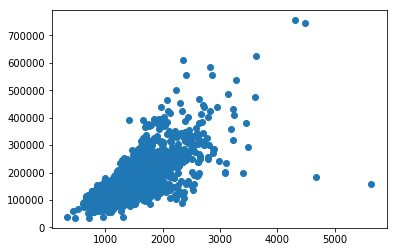

In [207]:
plt.scatter(x,y)

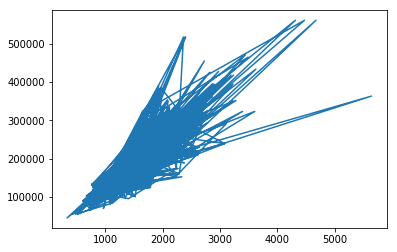

In [208]:
plt.plot(x, predict_knn)

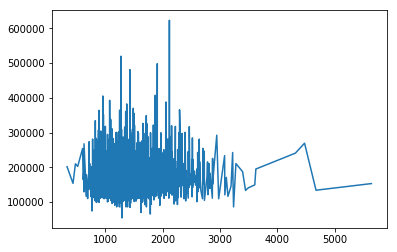

In [221]:
plt.plot(x.sort_values(by = ['GrLivArea'],ascending=True), predictors)

## Sample Datasets to use for LinearRegression Model

In [132]:
## Focus on these 2 datasets for building a model, adding polynomial features and making predictions

In [130]:
from sklearn.datasets import load_boston, california_housing

In [131]:
boston = load_boston()